In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score



import warnings
warnings.filterwarnings('ignore')

from acquire import get_titanic_data
from prepare import prep_titanic


# Exercise
In this exercise, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

For all of the models you create, choose a threshold that optimizes for accuracy.

Do your work for these exercises in either a notebook or a python script named model within your classification directory.

In [2]:
train, test = prep_titanic(get_titanic_data())

In [3]:
train, validate = train_test_split(train, random_state=123, train_size=.8)

In [4]:
validate.shape

(143, 16)

In [5]:
X_train = train[['pclass', 'fare']]
y_train = train[['survived']]

In [6]:
model = LogisticRegression(random_state=123).fit(X_train, y_train)

In [7]:
pd.DataFrame(model.predict_proba(X_train), columns=model.classes_)


,0,1
0,0.575003,0.424997
1,0.739567,0.260433
2,0.710199,0.289801
3,0.737715,0.262285
4,0.739381,0.260619
...,...,...
564,0.739483,0.260517
565,0.575341,0.424659
566,0.739248,0.260752
567,0.739838,0.260162


In [8]:
train['yhat'] = model.predict(X_train)
train['p_survived'] = model.predict_proba(X_train)[:, 1]

In [9]:
accuracy_score(train.survived, train.yhat)

0.6783831282952548

In [10]:
recall_score(train.survived, train.yhat)

0.40625

In [11]:
t = .65
train['yhat'] = train.p_survived > t

accuracy_score(train.survived, train.yhat), precision_score(train.survived, train.yhat), recall_score(train.survived, train.yhat)

(0.6590509666080844, 0.7272727272727273, 0.21428571428571427)

#### my validate test

In [12]:
# validate test
val_X = validate[['pclass', 'fare']]
val_y = validate.survived

t = .65
probs = model.predict(val_X)
yhat = (probs > t).astype(int)
actual = val_y

accuracy_score(actual, yhat)

0.6503496503496503

### exercise 1
Create another model that includes age in addition to fare and pclass. Does this model perform better than your previous one?

In [13]:
X_train = train[['pclass', 'fare', 'age']]
y_train = train.survived
val_X = validate[['pclass', 'fare', 'age']]
val_y = validate.survived

In [14]:
model = LogisticRegression(random_state=123).fit(X_train, y_train)
train['yhat'] = model.predict(X_train)
train['p_survived'] = model.predict_proba(X_train)[:, 1]

In [15]:
accuracy_score(train.survived, train.yhat)

0.7047451669595782

In [16]:
t = .65
train['yhat'] = train.p_survived > t

accuracy_score(train.survived, train.yhat), precision_score(train.survived, train.yhat), recall_score(train.survived, train.yhat)

(0.680140597539543, 0.8088235294117647, 0.24553571428571427)

#### validate test for pclass fare & age

In [17]:
t = .65
probs = model.predict(val_X)
yhat = (probs > t).astype(int)
actual = val_y

accuracy_score(actual, yhat)

0.6643356643356644

### exercise 2
Include sex in your model as well. Note that you'll need to encode this feature before including it in a model.

In [18]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,embarked C,embarked Q,embarked S,age_scaled,fare_scaled,yhat,p_survived
535,535,1,2,female,7.000000,0,2,26.2500,Second,Southampton,0,0.0,0.0,1.0,0.082684,0.051237,False,0.603909
573,573,1,3,female,29.832908,0,0,7.7500,Third,Queenstown,1,0.0,1.0,0.0,0.369602,0.015127,False,0.239684
736,736,0,3,female,48.000000,1,3,34.3750,Third,Southampton,0,0.0,0.0,1.0,0.597889,0.067096,False,0.173592
713,713,0,3,male,29.000000,0,0,9.4833,Third,Southampton,1,0.0,0.0,1.0,0.359135,0.018510,False,0.246009
528,528,0,3,male,39.000000,0,0,7.9250,Third,Southampton,1,0.0,0.0,1.0,0.484795,0.015469,False,0.193076


In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def encode(train, test, col_name):

    encoded_values = sorted(list(train[col_name].unique()))

    # Integer Encoding
    int_encoder = LabelEncoder()
    train.encoded = int_encoder.fit_transform(train[col_name])
    test.encoded = int_encoder.transform(test[col_name])

    # create 2D np arrays of the encoded variable (in train and test)
    train_array = np.array(train.encoded).reshape(len(train.encoded),1)
    test_array = np.array(test.encoded).reshape(len(test.encoded),1)

    # One Hot Encoding
    ohe = OneHotEncoder(sparse=False, categories='auto')
    train_ohe = ohe.fit_transform(train_array)
    test_ohe = ohe.transform(test_array)

    # Turn the array of new values into a data frame with columns names being the values
    # and index matching that of train/test
    # then merge the new dataframe with the existing train/test dataframe
    train_encoded = pd.DataFrame(data=train_ohe,
                            columns=encoded_values, index=train.index)
    train = train.join(train_encoded)

    test_encoded = pd.DataFrame(data=test_ohe,
                               columns=encoded_values, index=test.index)
    test = test.join(test_encoded)

    return train, test



In [20]:
train, validate = encode(train, validate, 'sex')

In [21]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,embarked C,embarked Q,embarked S,age_scaled,fare_scaled,yhat,p_survived,female,male
535,535,1,2,female,7.000000,0,2,26.2500,Second,Southampton,0,0.0,0.0,1.0,0.082684,0.051237,False,0.603909,1.0,0.0
573,573,1,3,female,29.832908,0,0,7.7500,Third,Queenstown,1,0.0,1.0,0.0,0.369602,0.015127,False,0.239684,1.0,0.0
736,736,0,3,female,48.000000,1,3,34.3750,Third,Southampton,0,0.0,0.0,1.0,0.597889,0.067096,False,0.173592,1.0,0.0
713,713,0,3,male,29.000000,0,0,9.4833,Third,Southampton,1,0.0,0.0,1.0,0.359135,0.018510,False,0.246009,0.0,1.0
528,528,0,3,male,39.000000,0,0,7.9250,Third,Southampton,1,0.0,0.0,1.0,0.484795,0.015469,False,0.193076,0.0,1.0


In [22]:
X_train = train[['pclass', 'fare', 'age', 'female', 'male']]
y_train = train.survived
val_X = validate[['pclass', 'fare', 'age', 'female', 'male']]
val_y = validate.survived

In [23]:
model = LogisticRegression(random_state=123).fit(X_train, y_train)
train['yhat'] = model.predict(X_train)
train['p_survived'] = model.predict_proba(X_train)[:, 1]

In [24]:
accuracy_score(train.survived, train.yhat)

0.7820738137082601

In [25]:
t = .65
train['yhat'] = train.p_survived > t

accuracy_score(train.survived, train.yhat), precision_score(train.survived, train.yhat), recall_score(train.survived, train.yhat)

(0.7768014059753954, 0.8943089430894309, 0.49107142857142855)

#### Validate test for pclass fare age and sex

In [26]:
t = .65
probs = model.predict(val_X)
yhat = (probs > t).astype(int)
actual = val_y

accuracy_score(actual, yhat)

0.8041958041958042

### exercise 3
Try out other combinations of features and models.

In [27]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,embarked C,embarked Q,embarked S,age_scaled,fare_scaled,yhat,p_survived,female,male
535,535,1,2,female,7.000000,0,2,26.2500,Second,Southampton,0,0.0,0.0,1.0,0.082684,0.051237,True,0.855826,1.0,0.0
573,573,1,3,female,29.832908,0,0,7.7500,Third,Queenstown,1,0.0,1.0,0.0,0.369602,0.015127,False,0.570351,1.0,0.0
736,736,0,3,female,48.000000,1,3,34.3750,Third,Southampton,0,0.0,0.0,1.0,0.597889,0.067096,False,0.479066,1.0,0.0
713,713,0,3,male,29.000000,0,0,9.4833,Third,Southampton,1,0.0,0.0,1.0,0.359135,0.018510,False,0.109269,0.0,1.0
528,528,0,3,male,39.000000,0,0,7.9250,Third,Southampton,1,0.0,0.0,1.0,0.484795,0.015469,False,0.089064,0.0,1.0


In [28]:
train, validate = encode(train, validate, 'class')

In [29]:
train, validate = encode(train, validate, 'embark_town')

In [30]:
train

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,...,yhat,p_survived,female,male,First,Second,Third,Cherbourg,Queenstown,Southampton
535,535,1,2,female,7.000000,0,2,26.2500,Second,Southampton,...,True,0.855826,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
573,573,1,3,female,29.832908,0,0,7.7500,Third,Queenstown,...,False,0.570351,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
736,736,0,3,female,48.000000,1,3,34.3750,Third,Southampton,...,False,0.479066,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
713,713,0,3,male,29.000000,0,0,9.4833,Third,Southampton,...,False,0.109269,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
528,528,0,3,male,39.000000,0,0,7.9250,Third,Southampton,...,False,0.089064,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,653,1,3,female,29.832908,0,0,7.8292,Third,Queenstown,...,False,0.570380,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
20,20,0,2,male,35.000000,0,0,26.0000,Second,Southampton,...,False,0.222559,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
589,589,0,3,male,29.832908,0,0,8.0500,Third,Southampton,...,False,0.107252,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
514,514,0,3,male,24.000000,0,0,7.4958,Third,Southampton,...,False,0.120361,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [31]:
X_train = train[['pclass', 'fare', 'age', 'female', 'male', 'First', 'Second', 'Third']]
y_train = train.survived
val_X = validate[['pclass', 'fare', 'age', 'female', 'male', 'First', 'Second', 'Third']]
val_y = validate.survived

model = LogisticRegression(random_state=123).fit(X_train, y_train)
train['yhat'] = model.predict(X_train)
train['p_survived'] = model.predict_proba(X_train)[:, 1]

In [32]:
accuracy_score(train.survived, train.yhat)

0.7943760984182777

In [33]:
t = .65
train['yhat'] = train.p_survived > t

accuracy_score(train.survived, train.yhat), precision_score(train.survived, train.yhat), recall_score(train.survived, train.yhat)

(0.7820738137082601, 0.8968253968253969, 0.5044642857142857)

#### validating

In [34]:
t = .65
probs = model.predict(val_X)
yhat = (probs > t).astype(int)
actual = val_y

accuracy_score(actual, yhat)

0.8041958041958042

### exercise 4
Choose you best model and evaluate it on the test dataset. Is it overfit?

In [35]:
train, test = prep_titanic(get_titanic_data())

In [36]:
train, test = encode(train, test, 'sex')

In [37]:
test.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,embarked C,embarked Q,embarked S,age_scaled,fare_scaled,female,male
172,172,1,3,female,1.000000,1,1,11.1333,Third,Southampton,0,0.0,0.0,1.0,0.007288,0.021731,1.0,0.0
524,524,0,3,male,29.832908,0,0,7.2292,Third,Cherbourg,1,1.0,0.0,0.0,0.369602,0.014110,0.0,1.0
452,452,0,1,male,30.000000,0,0,27.7500,First,Cherbourg,1,1.0,0.0,0.0,0.371701,0.054164,0.0,1.0
170,170,0,1,male,61.000000,0,0,33.5000,First,Southampton,1,0.0,0.0,1.0,0.761247,0.065388,0.0,1.0
620,620,0,3,male,27.000000,1,0,14.4542,Third,Cherbourg,0,1.0,0.0,0.0,0.334004,0.028213,0.0,1.0


In [38]:
X_test = test[['pclass', 'fare', 'age', 'female', 'male']]
y_test = test.survived
X_train = train[['pclass', 'fare', 'age', 'female', 'male']]
y_train = train.survived

In [39]:
model = LogisticRegression(random_state=123).fit(X_train, y_train)
train['yhat'] = model.predict(X_train)
train['p_survived'] = model.predict_proba(X_train)[:, 1]

In [40]:
accuracy_score(train.survived, train.yhat)

0.7865168539325843

In [41]:
t = .65
train['yhat'] = train.p_survived > t

accuracy_score(train.survived, train.yhat), precision_score(train.survived, train.yhat), recall_score(train.survived, train.yhat)

(0.7780898876404494, 0.8650306748466258, 0.5090252707581228)

#### my test data set

In [42]:
print('Accuracy of Logistic Regression classifier on test set: {:.4f}'
     .format(model.score(X_test, y_test)))






Accuracy of Logistic Regression classifier on test set: 0.7989


### Bonus 1:
How do different strategies for handling the missing values in the age column affect model performance?

### Bonus 2: 
How do different strategies for encoding sex affect model performance?

### Bonus 3: 
scikit-learn's LogisticRegression classifier is actually applying a regularization penalty to the coefficients by default. This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. This value can be modified with the C hyper parameter. Small values of C correspond to a larger penalty, and large values of C correspond to a smaller penalty.

Try out the following values for C and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected.

$C$ =.01, .1, 1, 10, 100, 1000

### Bonus Bonus: 
how does scaling the data interact with your choice of C?

**********************************************************

# Decision Tree Exercises

In [43]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import graphviz

from graphviz import Graph


from acquire import get_titanic_data
from prepare import prep_titanic

In [44]:
# acquiring data and splitting as well as prepping data from acquire and prep modules
train, test = prep_titanic(get_titanic_data())

In [45]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,embarked C,embarked Q,embarked S,age_scaled,fare_scaled
329,329,1,1,female,16.0,0,1,57.9792,First,Cherbourg,0,1.0,0.0,0.0,0.195778,0.113168
749,749,0,3,male,31.0,0,0,7.7500,Third,Queenstown,1,0.0,1.0,0.0,0.384267,0.015127
203,203,0,3,male,45.5,0,0,7.2250,Third,Cherbourg,1,1.0,0.0,0.0,0.566474,0.014102
421,421,0,3,male,21.0,0,0,7.7333,Third,Queenstown,1,0.0,1.0,0.0,0.258608,0.015094
97,97,1,1,male,23.0,0,1,63.3583,First,Cherbourg,0,1.0,0.0,0.0,0.283740,0.123667


In [46]:
# creating validate df from train data aswell as X_train and X_test
train, validate = train_test_split(train, random_state=123, test_size=.2)

X_train = train[['pclass', 'fare']]
y_train = train[['survived']]
X_val = validate[['pclass', 'fare']]
y_val = validate[['survived']]
X_test = test[['pclass', 'fare']]
y_test = test[['survived']]



## Exercise 1
Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample

In [47]:
# Create our object and fit our data
classfier = DecisionTreeClassifier(max_depth=3, random_state=123).fit(X_train, y_train)

In [48]:
# estimate survival rate
y_pred = classfier.predict(X_train)
y_pred_proba = classfier.predict_proba(X_train)

## Exercise 2
Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [49]:
# model.score using accuracy
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(classfier.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.71


In [50]:
y_train

,survived
535,1
573,1
736,0
713,0
528,0
...,...
653,1
20,0
589,0
514,0


In [51]:
# confusion matrix to evaluate our model
labels = sorted(y_train.survived.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,305,40
1,127,97


In [52]:
# Classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79       345
           1       0.71      0.43      0.54       224

    accuracy                           0.71       569
   macro avg       0.71      0.66      0.66       569
weighted avg       0.71      0.71      0.69       569



## Exercise 3
Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [53]:
accuracy = 0.71
tp = 97
fp = 127
tn = 305
fn = 40
precision = 0.71
recall = 0.43
f1 = 0.54
support = 224

In [54]:
print(f"Accuracy: {accuracy}")
print(f"TP: {tp}")
print(f"FP: {fp}")
print(f"TN: {tn}")
print(f"FN: {fn}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Support: {support}")

Accuracy: 0.71
TP: 97
FP: 127
TN: 305
FN: 40
Precision: 0.71
Recall: 0.43
F1-Score: 0.54
Support: 224


## Exercise 4
Run through steps 2-4 using entropy as your measure of impurity.

In [55]:
# creating validate df from train data aswell as X_train and X_test
train, validate = train_test_split(train, random_state=123, test_size=.2)

X_train = train[['pclass', 'fare']]
y_train = train[['survived']]
X_val = validate[['pclass', 'fare']]
y_val = validate[['survived']]
X_test = test[['pclass', 'fare']]
y_test = test[['survived']]



In [56]:
# Create our object and fit our data
classfier = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123).fit(X_train, y_train)

In [57]:
# estimate survival rate
y_pred = classfier.predict(X_train)
y_pred_proba = classfier.predict_proba(X_train)

In [58]:
# model.score using accuracy
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(classfier.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.67


In [59]:
# confusion matrix to evaluate our model
labels = sorted(y_train.survived.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,197,80
1,68,110


In [60]:
# Classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       277
           1       0.58      0.62      0.60       178

    accuracy                           0.67       455
   macro avg       0.66      0.66      0.66       455
weighted avg       0.68      0.67      0.68       455



In [61]:
accuracy = 0.67
tp = 110
fp = 68
tn = 197
fn = 80
precision = 0.58
recall = 0.62
f1 = 0.60
support = 178

In [62]:
print(f"Accuracy: {accuracy}")
print(f"TP: {tp}")
print(f"FP: {fp}")
print(f"TN: {tn}")
print(f"FN: {fn}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Support: {support}")

Accuracy: 0.67
TP: 110
FP: 68
TN: 197
FN: 80
Precision: 0.58
Recall: 0.62
F1-Score: 0.6
Support: 178


## Exercise 5
Which performs better on your in-sample data?

model 1 using the Ginni impurity performed better on my data when detecting True Negatives with a 71% accuracy and precision. Using the Entropy Impurity my model had less false positives but performed with a 67% accuracy and 58% precision score.

****************************************************************

# Random Forest Exercises

In [64]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from acquire import get_titanic_data
from prepare import prep_titanic

In [65]:
df = get_titanic_data()

In [66]:
def encode_gender(gender):
    if gender == 'male':
        return 0
    else:
        return 1
        

In [67]:
df.sex = df.sex.apply(encode_gender)
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,0,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,1,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,1,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,1,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,0,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [68]:
train, test = prep_titanic(df)

In [69]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,embarked C,embarked Q,embarked S,age_scaled,fare_scaled
329,329,1,1,1,16.0,0,1,57.9792,First,Cherbourg,0,1.0,0.0,0.0,0.195778,0.113168
749,749,0,3,0,31.0,0,0,7.7500,Third,Queenstown,1,0.0,1.0,0.0,0.384267,0.015127
203,203,0,3,0,45.5,0,0,7.2250,Third,Cherbourg,1,1.0,0.0,0.0,0.566474,0.014102
421,421,0,3,0,21.0,0,0,7.7333,Third,Queenstown,1,0.0,1.0,0.0,0.258608,0.015094
97,97,1,1,0,23.0,0,1,63.3583,First,Cherbourg,0,1.0,0.0,0.0,0.283740,0.123667


In [70]:
X_train = train[['pclass', 'sex', 'fare', 'age']]
y_train = train.survived
X_test = test[['pclass', 'sex','fare', 'age']]
y_test = test[['survived']]

## Exercise 1
Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 20.

In [71]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 329 to 510
Data columns (total 4 columns):
pclass    712 non-null int64
sex       712 non-null int64
fare      712 non-null float64
age       712 non-null float64
dtypes: float64(2), int64(2)
memory usage: 47.8 KB


In [72]:
# make and fit the thing
rf = RandomForestClassifier(min_samples_leaf=1, max_depth=20, random_state=123)

In [73]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [74]:
y_pred = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_train)

## Exercise 2
Evaluate your results using the model score, confusion matrix, and classification report.

In [75]:
# model score
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.97


In [76]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,427,8
1,15,262


In [77]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       435
           1       0.97      0.95      0.96       277

    accuracy                           0.97       712
   macro avg       0.97      0.96      0.97       712
weighted avg       0.97      0.97      0.97       712



## Exercise 3
Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [78]:
accuracy = 0.97
tp = 262
fp = 15
tn = 427
fn = 8
precision = 0.97
recall = 0.95
f1 = 0.96
support = 277

In [79]:
print(f"Accuracy: {accuracy}")
print(f"TP: {tp}")
print(f"FP: {fp}")
print(f"TN: {tn}")
print(f"FN: {fn}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Support: {support}")

Accuracy: 0.97
TP: 262
FP: 15
TN: 427
FN: 8
Precision: 0.97
Recall: 0.95
F1-Score: 0.96
Support: 277


### test data

In [80]:
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)

In [81]:
# model score
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of random forest classifier on training set: 0.82


In [82]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,99,15
1,17,48


In [83]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       114
           1       0.76      0.74      0.75        65

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



## Exercise 4
Run through steps increasing your min_samples_leaf to 5 and decreasing your max_depth to 3.

In [84]:
X_train = train[['pclass', 'sex', 'fare', 'age']]
y_train = train.survived
X_test = test[['pclass', 'sex','fare', 'age']]
y_test = test[['survived']]

In [85]:
# make and fit the thing
rf = RandomForestClassifier(min_samples_leaf=5, max_depth=3, random_state=123)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [86]:
y_pred = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_train)

In [87]:
# model score
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.82


In [88]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,402,33
1,96,181


In [89]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       435
           1       0.85      0.65      0.74       277

    accuracy                           0.82       712
   macro avg       0.83      0.79      0.80       712
weighted avg       0.82      0.82      0.81       712



In [90]:
accuracy = 0.82
tp = 181
fp = 96
tn = 402
fn = 33
precision = 0.85
recall = 0.65
f1 = 0.74
support = 277

In [91]:
print(f"Accuracy: {accuracy}")
print(f"TP: {tp}")
print(f"FP: {fp}")
print(f"TN: {tn}")
print(f"FN: {fn}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Support: {support}")

Accuracy: 0.82
TP: 181
FP: 96
TN: 402
FN: 33
Precision: 0.85
Recall: 0.65
F1-Score: 0.74
Support: 277


### Test Data

In [93]:
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)

In [94]:
# model score
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of random forest classifier on training set: 0.83


In [95]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,104,10
1,21,44


In [96]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       114
           1       0.81      0.68      0.74        65

    accuracy                           0.83       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.83      0.83      0.82       179



## Exercise 5
What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

> Using a higher max depth lead for a more accurate train model accuracy, but both models had a delta of 1% between the two. and the 2nd model using a lower max depth and higher sample leaf had a less precise but closer result to the test data

*********************************************************************

# K-Nearest Neighbors Exercises

In [84]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler


from acquire import get_titanic_data, get_iris_data
from prepare import prep_titanic, prep_iris

In [85]:
# acquireing data
df = get_titanic_data()

In [86]:
# encoding gender from a string to 0 for male 1 for female
def encode_gender(gender):
    if gender == 'male':
        return 0
    else:
        return 1
        

In [87]:
df.sex = df.sex.apply(encode_gender)


In [88]:
train, test = prep_titanic(df)

In [89]:
train.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,embarked C,embarked Q,embarked S,age_scaled,fare_scaled
329,329,1,1,1,16.0,0,1,57.9792,First,Cherbourg,0,1.0,0.0,0.0,0.195778,0.113168
749,749,0,3,0,31.0,0,0,7.7500,Third,Queenstown,1,0.0,1.0,0.0,0.384267,0.015127
203,203,0,3,0,45.5,0,0,7.2250,Third,Cherbourg,1,1.0,0.0,0.0,0.566474,0.014102


In [90]:
train, validate = train_test_split(train, test_size=.2, random_state=123)

In [91]:
X_train = train[['pclass', 'sex', 'age_scaled','fare_scaled']]
y_train = train[['survived']]
X_val = validate[['pclass', 'sex','age_scaled','fare_scaled']]
y_val = validate[['survived']]
X_test = test[['pclass', 'sex','age_scaled','fare_scaled']]
y_test = test[['survived']]

## Exercise 1 
Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [92]:
# selecting our object and fitting our data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [93]:
# selecting our probabaility and predictions
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

## Exercise 2
Evaluate your results using the model score, confusion matrix, and classification report.

In [94]:
# model score
knn.score(X_train, y_train)

0.8453427065026362

In [95]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,312,33
1,55,169


In [96]:
# class report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       345
           1       0.84      0.75      0.79       224

    accuracy                           0.85       569
   macro avg       0.84      0.83      0.83       569
weighted avg       0.84      0.85      0.84       569



## Exercise 3 
Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [97]:
accuracy = 0.85
tp = 169
fp = 55
tn = 312
fn = 33
precision = 0.84
recall = 0.75
f1 = 0.79
support = 224

In [98]:
print(f"Accuracy: {accuracy}")
print(f"TP: {tp}")
print(f"FP: {fp}")
print(f"TN: {tn}")
print(f"FN: {fn}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Support: {support}")

Accuracy: 0.85
TP: 169
FP: 55
TN: 312
FN: 33
Precision: 0.84
Recall: 0.75
F1-Score: 0.79
Support: 224


## Exercise 4 
Run through steps 2-4 setting k to 10

In [99]:
# selecting our object and fitting our data
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [100]:
# selecting our probabaility and predictions
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

In [101]:
# model score
knn.score(X_train, y_train)

0.8066783831282952

In [102]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,320,25
1,85,139


In [103]:
# class report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       345
           1       0.85      0.62      0.72       224

    accuracy                           0.81       569
   macro avg       0.82      0.77      0.78       569
weighted avg       0.81      0.81      0.80       569



In [104]:
accuracy = 0.81
tp = 139
fp = 85
tn = 320
fn = 25
precision = 0.85
recall = 0.62
f1 = 0.72
support = 224

In [105]:
print(f"Accuracy: {accuracy}")
print(f"TP: {tp}")
print(f"FP: {fp}")
print(f"TN: {tn}")
print(f"FN: {fn}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Support: {support}")

Accuracy: 0.81
TP: 139
FP: 85
TN: 320
FN: 25
Precision: 0.85
Recall: 0.62
F1-Score: 0.72
Support: 224


## Exercise 5
Run through steps 2-4 setting k to 20

In [106]:
# selecting our object and fitting our data
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [107]:
# selecting our probabaility and predictions
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

In [108]:
# model score
knn.score(X_train, y_train)

0.8031634446397188

In [109]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,311,34
1,78,146


In [110]:
# class report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       345
           1       0.81      0.65      0.72       224

    accuracy                           0.80       569
   macro avg       0.81      0.78      0.79       569
weighted avg       0.80      0.80      0.80       569



In [111]:
accuracy = 0.80
tp = 146
fp = 78
tn = 311
fn = 34
precision = 0.81
recall = 0.65
f1 = 0.72
support = 224

In [112]:
print(f"Accuracy: {accuracy}")
print(f"TP: {tp}")
print(f"FP: {fp}")
print(f"TN: {tn}")
print(f"FN: {fn}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Support: {support}")

Accuracy: 0.8
TP: 146
FP: 78
TN: 311
FN: 34
Precision: 0.81
Recall: 0.65
F1-Score: 0.72
Support: 224


## Exercise 6
What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

>it seems the lower the neighbors the more accurate the accuracy.

# Test
For both the iris and the titanic data,

In [135]:
iris_df = get_iris_data()


iris_train, iris_test = train_test_split(iris_df, random_state=123, test_size=0.2)

In [136]:
iris_train.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
130,3,131,7.4,2.8,6.1,1.9,virginica
119,3,120,6.0,2.2,5.0,1.5,virginica
29,1,30,4.7,3.2,1.6,0.2,setosa
0,1,1,5.1,3.5,1.4,0.2,setosa
62,2,63,6.0,2.2,4.0,1.0,versicolor


In [137]:
iris_X_train = iris_train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
iris_y_train = iris_train[['species_name']]
iris_X_test = iris_test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
iris_y_test = iris_test[['species_name']]

In [138]:
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [140]:
iris_y_pred = knn.predict(iris_X_train)
iris_pred_proba = knn.predict_proba(iris_X_train)

## Exercise 1
Determine which model (with hyperparameters) performs the best (try reducing the number of features to the top 4 features in terms of information gained for each feature individually).

In [129]:
X_train

,pclass,sex,age_scaled,fare_scaled
535,2,1,0.082684,0.051237
573,3,1,0.369602,0.015127
736,3,1,0.597889,0.067096
713,3,0,0.359135,0.018510
528,3,0,0.484795,0.015469
...,...,...,...,...
653,3,1,0.369602,0.015282
20,2,0,0.434531,0.050749
589,3,0,0.369602,0.015713
514,3,0,0.296306,0.014631


## Exercise 2
Create a new dataframe with top 4 features.

([<matplotlib.axis.XTick at 0x13725ac10>,
 <a list of 5 Text major ticklabel objects>)

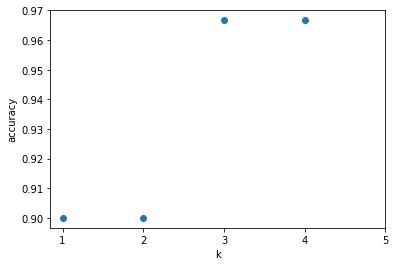

In [143]:
k_range = range(1, 5)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(iris_X_train, iris_y_train)
    scores.append(knn.score(iris_X_test, iris_y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([1,2,3,4,5])

## Exercise 3
Use the top performing algorithm with the metaparameters used in that model. Create the object, fit, transform on in-sample data, and evaluate the results with the training data. Compare your evaluation metrics with those from the original model (with all the features).

In [146]:
#optimal k with my 4 feature dataframe for titanic and iris data
titanic_k = 2
iris_k = 3

In [147]:
knn = KNeighborsClassifier(n_neighbors=2, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [148]:
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

In [149]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.84


Now for iris data

In [150]:
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [151]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(iris_X_test, iris_y_test)))

Accuracy of KNN classifier on test set: 0.97


## Exercise 4
Run your final model on your out-of-sample dataframe (test_df). Evaluate the results.

# Feature Engineering
- Titanic Data
    - Create a feature named who, this should be either man, woman, or child. How does including this feature affect your model's performance?

In [153]:
train['who'] = train

train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,embarked C,embarked Q,embarked S,age_scaled,fare_scaled
535,535,1,2,1,7.000000,0,2,26.2500,Second,Southampton,0,0.0,0.0,1.0,0.082684,0.051237
573,573,1,3,1,29.832908,0,0,7.7500,Third,Queenstown,1,0.0,1.0,0.0,0.369602,0.015127
736,736,0,3,1,48.000000,1,3,34.3750,Third,Southampton,0,0.0,0.0,1.0,0.597889,0.067096
713,713,0,3,0,29.000000,0,0,9.4833,Third,Southampton,1,0.0,0.0,1.0,0.359135,0.018510
528,528,0,3,0,39.000000,0,0,7.9250,Third,Southampton,1,0.0,0.0,1.0,0.484795,0.015469


    - Create a feature named adult_male that is either a 1 or a 0. How does this affect your model's predictions?

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,embarked C,embarked Q,embarked S,age_scaled,fare_scaled
535,535,1,2,1,7.000000,0,2,26.2500,Second,Southampton,0,0.0,0.0,1.0,0.082684,0.051237
573,573,1,3,1,29.832908,0,0,7.7500,Third,Queenstown,1,0.0,1.0,0.0,0.369602,0.015127
736,736,0,3,1,48.000000,1,3,34.3750,Third,Southampton,0,0.0,0.0,1.0,0.597889,0.067096
713,713,0,3,0,29.000000,0,0,9.4833,Third,Southampton,1,0.0,0.0,1.0,0.359135,0.018510
528,528,0,3,0,39.000000,0,0,7.9250,Third,Southampton,1,0.0,0.0,1.0,0.484795,0.015469


- Iris Data
    - Create features named petal_area and sepal_area

In [155]:
iris_X_train['petal_area'] = iris_X_train['petal_length'] * iris_X_train['petal_width']
iris_X_train['sepal_area'] = iris_X_train['sepal_length'] * iris_X_train['sepal_width']

knn = KNeighborsClassifier(n_neighbors=2, weights='uniform')
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [158]:
iris_X_test['petal_area'] = iris_X_test['petal_length'] * iris_X_test['petal_width']
iris_X_test['sepal_area'] = iris_X_test['sepal_length'] * iris_X_test['sepal_width']

In [160]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(iris_X_test, iris_y_test)))

Accuracy of KNN classifier on test set: 0.93
